# Введение в искусственные нейронные сети

# Урок 2. Keras

## Домашнее задание

Используем набор примеров fashion-MNIST
1. Опишите - какой результат нейросети получен в зависимости от:
  - числа нейронов в слое (для 2-х слойной сети), 
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых параметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.
2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1. Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 

4. Для одного варианта сети сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота, точность).

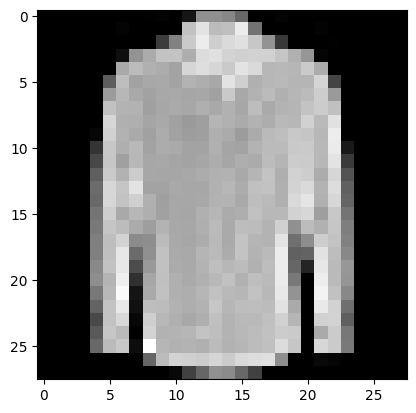

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from keras.datasets import fashion_mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Lambda
from tensorflow.keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = fashion_mnist.load_data()

train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)

y_train, y_test = to_categorical(train_labels), to_categorical(test_labels)

plt.imshow(train_images[np.random.randint(len(train_images))].squeeze(), cmap="gray")
plt.show()

In [3]:
train_images = train_images / 255.
test_images = test_images / 255.

valid_images, test_images, y_valid, y_test = train_test_split(test_images, y_test, test_size=0.5, random_state=42)

batch_size = 128
buffer_size = 256

AUTOTUNE = tf.data.AUTOTUNE

train_ds = tf.data.Dataset.from_tensor_slices((train_images.reshape((-1, 784)), y_train)).shuffle(buffer_size).batch(batch_size).prefetch(AUTOTUNE)
valid_ds = tf.data.Dataset.from_tensor_slices((valid_images.reshape((-1, 784)), y_valid)).batch(batch_size).prefetch(AUTOTUNE)
test_ds = tf.data.Dataset.from_tensor_slices((test_images.reshape((-1, 784)), y_test)).batch(batch_size).prefetch(AUTOTUNE)

num_neurons = [512, 256, 128]

for i, neurons in enumerate(num_neurons):
    model = Sequential([
        Dense(neurons, activation="relu", input_shape=(784,)),
        Dense(10, activation="softmax")
    ])
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])  # default lr = 1e-3
    print(f"Experiment {i+1} with {neurons} neurons".center(100, "_"))
    history = model.fit(train_ds,
                        epochs=15,
                        validation_data=valid_ds,
                        verbose=1)
    model.evaluate(test_ds)

___________________________________Experiment 1 with 512 neurons____________________________________
Epoch 1/15


2023-06-14 20:29:27.314721: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [60000,784]
	 [[{{node Placeholder/_0}}]]
2023-06-14 20:29:27.315101: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [60000,10]
	 [[{{node Placeholder/_1}}]]


468/469 [============================>.] - ETA: 0s - loss: 0.5054 - accuracy: 0.8223

2023-06-14 20:29:30.437018: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [5000,10]
	 [[{{node Placeholder/_1}}]]


469/469 [==============================] - 3s 6ms/step - loss: 0.5052 - accuracy: 0.8224 - val_loss: 0.4303 - val_accuracy: 0.8484
Epoch 2/15
469/469 [==============================] - 3s 6ms/step - loss: 0.3710 - accuracy: 0.8679 - val_loss: 0.3984 - val_accuracy: 0.8574
Epoch 3/15
469/469 [==============================] - 3s 6ms/step - loss: 0.3326 - accuracy: 0.8799 - val_loss: 0.3763 - val_accuracy: 0.8652
Epoch 4/15
469/469 [==============================] - 3s 5ms/step - loss: 0.3049 - accuracy: 0.8889 - val_loss: 0.3468 - val_accuracy: 0.8804
Epoch 5/15
469/469 [==============================] - 3s 5ms/step - loss: 0.2848 - accuracy: 0.8962 - val_loss: 0.3557 - val_accuracy: 0.8730
Epoch 6/15
469/469 [==============================] - 3s 6ms/step - loss: 0.2719 - accuracy: 0.9009 - val_loss: 0.3316 - val_accuracy: 0.8854
Epoch 7/15
469/469 [==============================] - 3s 5ms/step - loss: 0.2590 - accuracy: 0.9044 - val_loss: 0.3378 - val_accuracy: 0.8852
Epoch 8/15
469/46

2023-06-14 20:30:07.887767: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [5000,10]
	 [[{{node Placeholder/_1}}]]


___________________________________Experiment 2 with 256 neurons____________________________________
Epoch 1/15
469/469 [==============================] - 2s 5ms/step - loss: 0.5284 - accuracy: 0.8163 - val_loss: 0.4608 - val_accuracy: 0.8362
Epoch 2/15
469/469 [==============================] - 2s 4ms/step - loss: 0.3896 - accuracy: 0.8622 - val_loss: 0.4079 - val_accuracy: 0.8598
Epoch 3/15
469/469 [==============================] - 2s 4ms/step - loss: 0.3486 - accuracy: 0.8753 - val_loss: 0.3869 - val_accuracy: 0.8582
Epoch 4/15
469/469 [==============================] - 2s 4ms/step - loss: 0.3205 - accuracy: 0.8848 - val_loss: 0.3639 - val_accuracy: 0.8744
Epoch 5/15
469/469 [==============================] - 2s 4ms/step - loss: 0.3009 - accuracy: 0.8898 - val_loss: 0.3629 - val_accuracy: 0.8726
Epoch 6/15
469/469 [==============================] - 2s 4ms/step - loss: 0.2850 - accuracy: 0.8962 - val_loss: 0.3536 - val_accuracy: 0.8756
Epoch 7/15
469/469 [===========================

In [5]:
num_layers = [2,3,5,10]
num_layers = [[16 * (2**j) for j in range(1, i)] for i in num_layers]

for i, layers in enumerate(num_layers): 
    layers = [Dense(neurons, activation="relu") for neurons in sorted(num_layers[i], reverse=True)]
    last_layer = [Dense(10, activation="softmax")]
    model = Sequential([Input(shape=(784,))] + layers + last_layer)

    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])  # default lr = 1e-3
    print(f"Experiment {i+1} with {len(layers) + 1} layers".center(100, "_"))
    history = model.fit(train_ds,
                        epochs=10,
                        validation_data=valid_ds,
                        verbose=2)
    model.evaluate(test_ds)

_____________________________________Experiment 1 with 2 layers_____________________________________
Epoch 1/10
469/469 - 2s - loss: 0.6613 - accuracy: 0.7757 - val_loss: 0.5048 - val_accuracy: 0.8214 - 2s/epoch - 4ms/step
Epoch 2/10
469/469 - 1s - loss: 0.4458 - accuracy: 0.8465 - val_loss: 0.4646 - val_accuracy: 0.8366 - 1s/epoch - 3ms/step
Epoch 3/10
469/469 - 1s - loss: 0.4122 - accuracy: 0.8571 - val_loss: 0.4473 - val_accuracy: 0.8432 - 1s/epoch - 3ms/step
Epoch 4/10
469/469 - 1s - loss: 0.3906 - accuracy: 0.8636 - val_loss: 0.4289 - val_accuracy: 0.8502 - 1s/epoch - 3ms/step
Epoch 5/10
469/469 - 1s - loss: 0.3773 - accuracy: 0.8689 - val_loss: 0.4218 - val_accuracy: 0.8522 - 1s/epoch - 3ms/step
Epoch 6/10
469/469 - 1s - loss: 0.3659 - accuracy: 0.8719 - val_loss: 0.4133 - val_accuracy: 0.8564 - 1s/epoch - 3ms/step
Epoch 7/10
469/469 - 1s - loss: 0.3568 - accuracy: 0.8752 - val_loss: 0.4035 - val_accuracy: 0.8616 - 1s/epoch - 2ms/step
Epoch 8/10
469/469 - 1s - loss: 0.3499 - accu

**Вывод**

* качество слоёв и нейронов влияет на качество обучения
* все модели переобучились
* для каждого варианта слоёв/нейронов надо подбирать свои гиперпараметры


In [6]:
# Задание: проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1. Фиксируйте для тренировочного и тестового набора метрики accuracy.

epochs = 15
model = Sequential([Dense(128, activation="relu", input_shape=(784,)),
                    Dense(64, activation='relu'),
                    Dense(10, activation='softmax'),
                    ])

model.save_weights('model.h5')

for i, optim in enumerate(['SGD','RMSProp','adam','NAdam']):
    model = Sequential([
                        Dense(128, activation="relu", input_shape=(784,)),
                        Dense(64, activation='relu'),
                        Dense(10, activation='softmax'),
                        ])  
    model.load_weights('model.h5')
    model.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'],)

    history = model.fit(
                        train_ds,
                        epochs=epochs,
                        validation_data=valid_ds,
                        verbose=0
                        )
    train_acc = model.evaluate(train_ds, verbose = 0)
    valid_acc = model.evaluate(test_ds, verbose = 0)
    print(f"{optim}: точность обучения: {round(train_acc[1], 4)}, точность на тестовой выборке: {round(valid_acc[1], 4)}")

SGD: точность обучения: 0.8639, точность на тестовой выборке: 0.8494
RMSProp: точность обучения: 0.9080, точность на тестовой выборке: 0.877
adam: точность обучения: 0.9126, точность на тестовой выборке: 0.8752
NAdam: точность обучения: 0.9147, точность на тестовой выборке: 0.88


**Вывод**

Оптимизаторы улучшают качество модели.

157/157 [==============================] - 0s 806us/step


<Figure size 500x500 with 0 Axes>

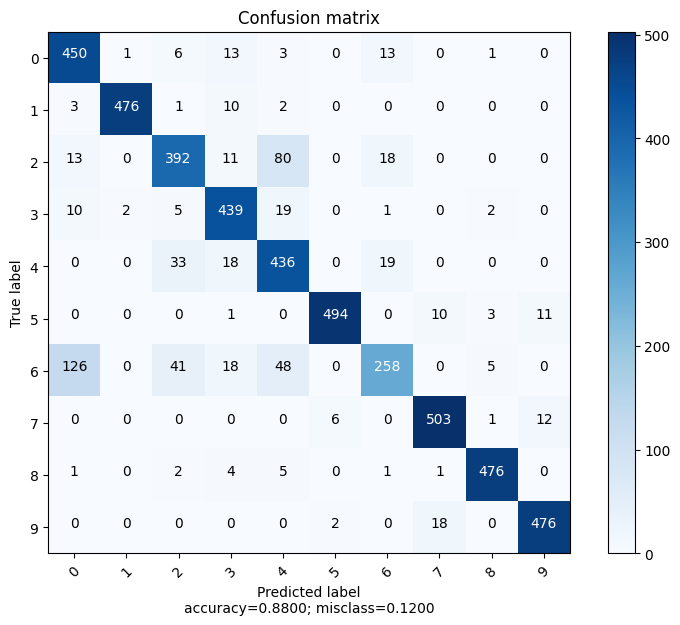

In [7]:
from itertools import product
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

y_true = y_test.argmax(1)
y_pred = model.predict(test_images.reshape((-1, 784))).argmax(1)

cnf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5, 5))
plot_confusion_matrix(cnf_matrix, 
                      target_names=[i for i in range(10)], normalize=False, title='Confusion matrix',)
plt.show()

In [8]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.92      0.83       487
           1       0.99      0.97      0.98       492
           2       0.82      0.76      0.79       514
           3       0.85      0.92      0.89       478
           4       0.74      0.86      0.79       506
           5       0.98      0.95      0.97       519
           6       0.83      0.52      0.64       496
           7       0.95      0.96      0.95       522
           8       0.98      0.97      0.97       490
           9       0.95      0.96      0.96       496

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000

